<a href="https://colab.research.google.com/github/prakashkmr48/facenet/blob/master/Prompt_based_Image_In_Painting_powered_by_ClipSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git lfs install

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.


In [ ]:
! git clone https://github.com/timojl/clipseg

Cloning into 'clipseg'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 168 (delta 36), reused 39 (delta 16), pack-reused 91
Receiving objects: 100% (168/168), 1.21 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Filtering content: 100% (2/2), 5.17 MiB | 4.45 MiB/s, done.


In [ ]:
! pip install diffusers -q

     |████████████████████████████████| 153 kB 30.5 MB/s 
     |████████████████████████████████| 120 kB 54.7 MB/s 


In [ ]:
! pip install transformers -q -UU ftfy gradio

     |████████████████████████████████| 4.9 MB 32.2 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 5.3 MB 67.9 MB/s 
     |████████████████████████████████| 6.6 MB 56.2 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 57 kB 6.2 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 212 kB 73.5 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 112 kB 74.3 MB/s 
     |████████████████████████████████| 2.3 MB 57.4 MB/s 
     |████████████████████████████████| 270 kB 73.0 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 63 kB 2.8 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 68 kB 7.1 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████

In [ ]:
! pip install git+https://github.com/openai/CLIP.git -q

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
%cd clipseg

/content/clipseg


In [ ]:
! ls

datasets	     metrics.py        supplementary.pdf
environment.yml      models	       Tables.ipynb
evaluation_utils.py  overview.png      training.py
example_image.jpg    Quickstart.ipynb  Visual_Feature_Engineering.ipynb
experiments	     Readme.md	       weights
general_utils.py     score.py
LICENSE		     setup.py


In [ ]:
import torch
import requests
import cv2 
from models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

In [ ]:
from io import BytesIO

from torch import autocast
import requests
import PIL
import torch
from diffusers import StableDiffusionInpaintPipeline as StableDiffusionInpaintPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
#! git lfs install

In [ ]:
# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval();

100%|████████████████████████████████████████| 335M/335M [00:01<00:00, 282MiB/s]


In [ ]:
# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load('/content/clipseg/weights/rd64-uni.pth', map_location=torch.device('cuda')), strict=False);

In [ ]:
device = "cuda"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

{'trained_betas'} was not found in config. Values will be initialized to default values.


In [67]:
# or load from URL...
image_url = 'https://prakashkmr48.files.wordpress.com/2018/07/cropped-my-pic.jpg?w=200' #'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimage.tmdb.org%2Ft%2Fp%2Foriginal%2F72xYNWRTVMDiKVa6SVu6EY0S9Np.jpg' #'https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png' 
input_image = Image.open(requests.get(image_url, stream=True).raw)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((512, 512)),
])
img = transform(input_image).unsqueeze(0)

In [44]:
%cd ..

/


In [45]:
input_image.convert("RGB").resize((512, 512)).save("init_image.png", "PNG")

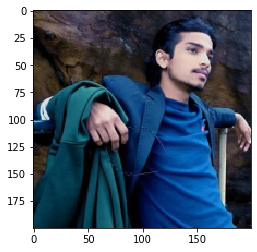

In [46]:
from matplotlib import pyplot as plt
plt.imshow(input_image, interpolation='nearest')
plt.show()

In [82]:
prompts = ['shirt']

In [83]:

# predict
with torch.no_grad():
    preds = model(img.repeat(len(prompts),1,1,1), prompts)[0]

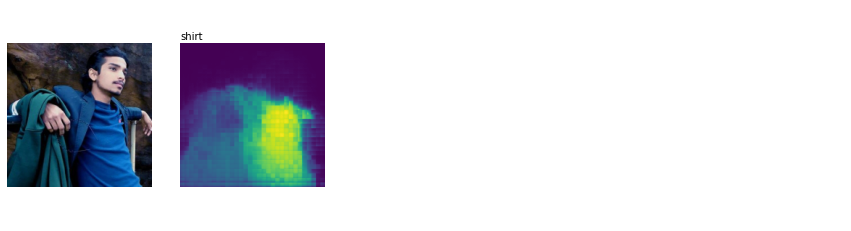

In [84]:
# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompts[i]) for i in range(len(prompts))];

In [85]:
filename = f"mask.png"
plt.imsave(filename,torch.sigmoid(preds[0][0]))

In [86]:
img2 = cv2.imread(filename)

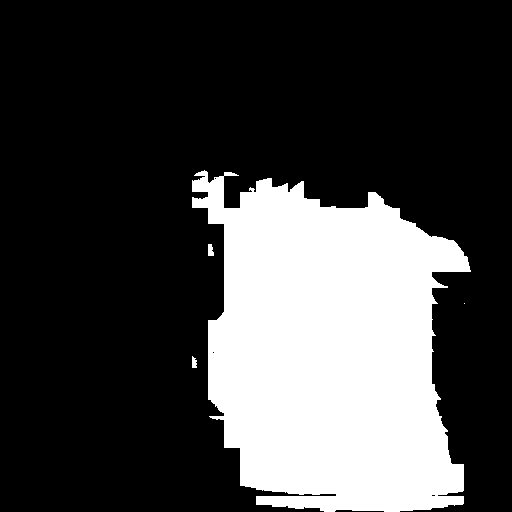

In [87]:
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# For debugging only:
cv2.imwrite(filename,bw_image)

# fix color format
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

Image.fromarray(bw_image)

In [88]:
init_image = Image.open('init_image.png')
mask = Image.open('mask.png')

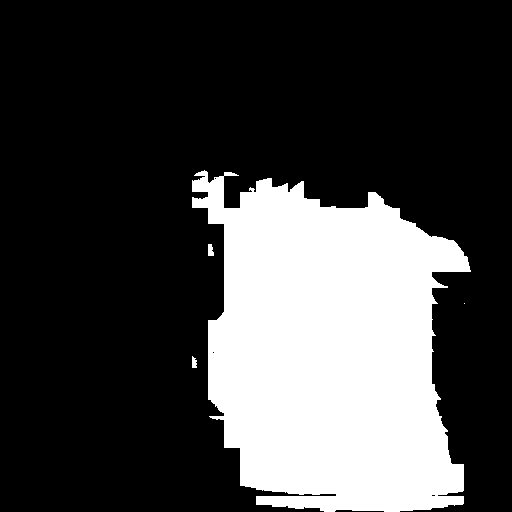

In [89]:
mask

In [92]:
with autocast("cuda"):
    images = pipe(prompt=" a blue check shirt", init_image=init_image, mask_image=mask, strength=0.8)["sample"]

0it [00:00, ?it/s]

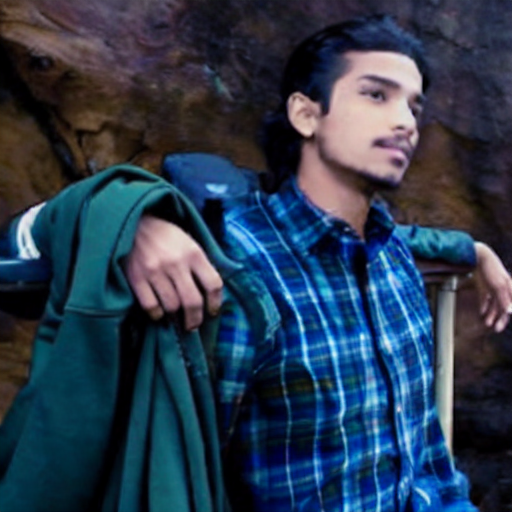

In [93]:
images[0]